# Phân tích khám phá dữ liệu


In [56]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

# Nạp dữ liệu


In [57]:
df_train = pd.read_csv('../../../data/train.csv')
df_test = pd.read_csv('../../../data/test.csv')

In [58]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Kiểm tra missing value


In [59]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


# Khám phá dữ liệu


## Pclass


In [63]:
df_train.value_counts('Pclass').reset_index()

,Pclass,count
0,3,491
1,1,216
2,2,184


In [64]:
df_train['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

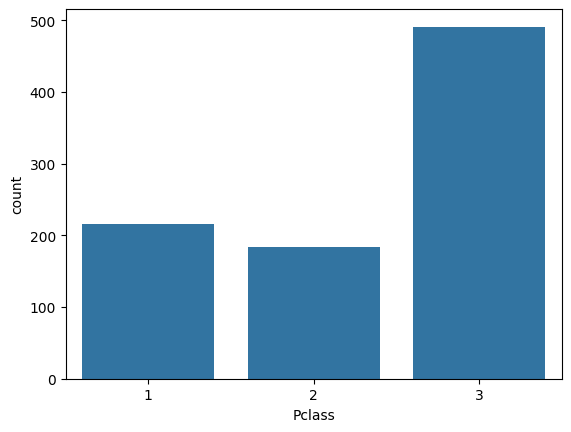

In [65]:
sns.countplot(data=df_train, x='Pclass')
plt.show()

Nhận xét:

- Số lượng người hạng vé 3 là cao nhất trong 3 hạng vé


## Sex


In [66]:
df_train.value_counts('Sex').reset_index()

,Sex,count
0,male,577
1,female,314


In [67]:
df_train['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

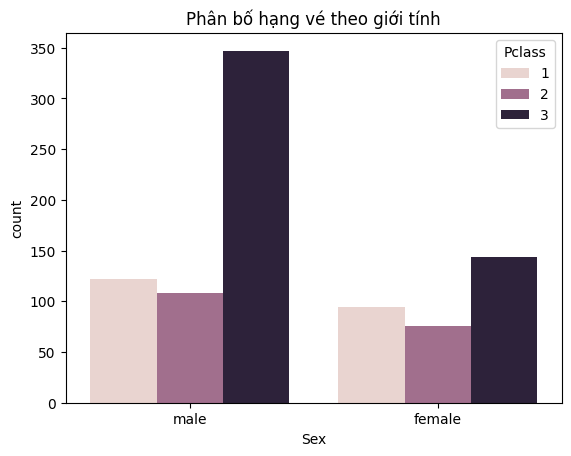

In [68]:
ax = sns.countplot(data=df_train, x='Sex', hue='Pclass')
ax.set_title('Phân bố hạng vé theo giới tính')
plt.show()

Nhận xét

- Biểu đồ countplot cho thấy số lượng hàng khách ở cả nam và nữ sẽ có vé hạng 3 nhiều nhất


## Age


In [69]:
df_train.value_counts('Age').reset_index().iloc[:10]

,Age,count
0,24.0,30
1,22.0,27
2,18.0,26
3,19.0,25
4,30.0,25
5,28.0,25
6,21.0,24
7,25.0,23
8,36.0,22
9,29.0,20


In [70]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

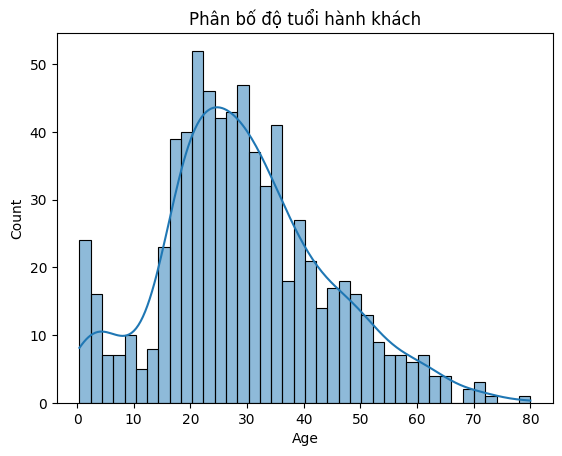

In [71]:
ax = sns.histplot(data=df_train, x='Age', bins=40, kde=True)
ax.set_title('Phân bố độ tuổi hành khách')
plt.show()

Nhận xét:

- Khách hàng đa phần nằm ở độ tuổi: 15 - 40
- Số lượng người lớn tuổi từ 60 - 80 tương đối ít


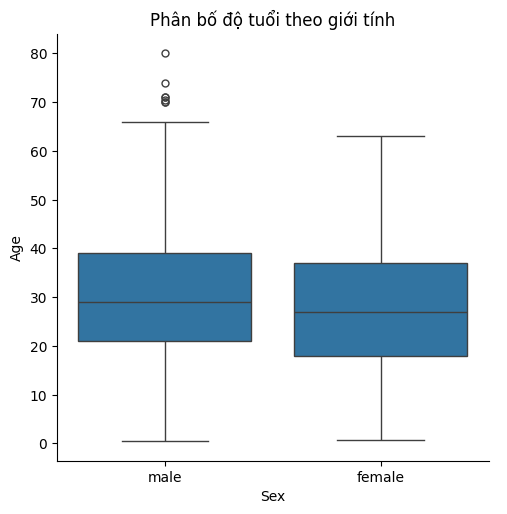

In [72]:
sns.catplot(data=df_train, x='Sex', y='Age', kind='box')
plt.title('Phân bố độ tuổi theo giới tính')
plt.show()

Nhận xét:

- Boxplot cả 2 giới tính có trung vị ở giữa hộp
- Xuất hiện outliers phía trên ở giới tính nam


## Name


In [73]:
df_train['Name'].value_counts().reset_index().iloc[:10]

,Name,count
0,"Braund, Mr. Owen Harris",1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",1
5,"Moran, Mr. James",1
6,"McCarthy, Mr. Timothy J",1
7,"Palsson, Master. Gosta Leonard",1
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1
9,"Nasser, Mrs. Nicholas (Adele Achem)",1


Trích xuất ra danh xưng


In [74]:
df_train['Title'] = df_train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
np.unique(df_train['Title'])

array(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
       'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
       'the Countess'], dtype=object)

In [75]:
df_train['Title'].value_counts().reset_index().iloc[:10]

,Title,count
0,Mr,517
1,Miss,182
2,Mrs,125
3,Master,40
4,Dr,7
5,Rev,6
6,Col,2
7,Mlle,2
8,Major,2
9,Ms,1


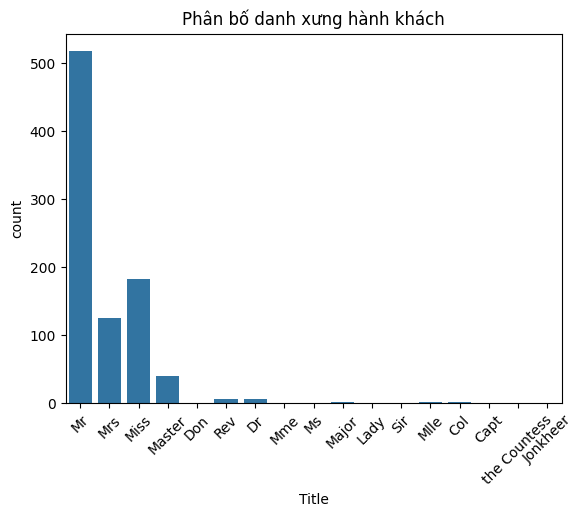

In [76]:
ax = sns.countplot(data=df_train, x='Title')
ax.set_title('Phân bố danh xưng hành khách')
plt.xticks(rotation=45)
plt.show()

Nhận xét:

- Các danh xưng xuất hiện phổ biến là: Mr, Mrs, Miss, Master


## SibSp


In [77]:
df_train['SibSp'].value_counts().reset_index()

,SibSp,count
0,0,608
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5


In [78]:
df_train['SibSp'].describe()


count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

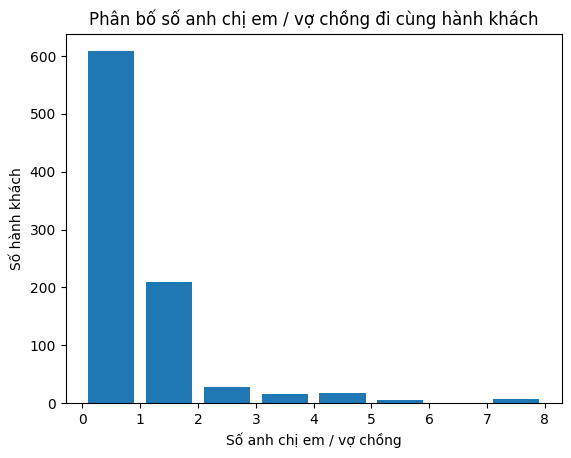

In [79]:
plt.hist(df_train['SibSp'], bins=8, rwidth=0.8)
plt.title('Phân bố số anh chị em / vợ chồng đi cùng hành khách')
plt.xlabel('Số anh chị em / vợ chồng')
plt.ylabel('Số hành khách')
plt.show()

Nhận xét:

- Số người không đi cùng anh chị em / vợ chồng là cao nhất -> Khả năng đi một mình cao


## Parch


In [80]:
df_train['Parch'].value_counts().reset_index()

,Parch,count
0,0,678
1,1,118
2,2,80
3,5,5
4,3,5
5,4,4
6,6,1


In [81]:
df_train['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

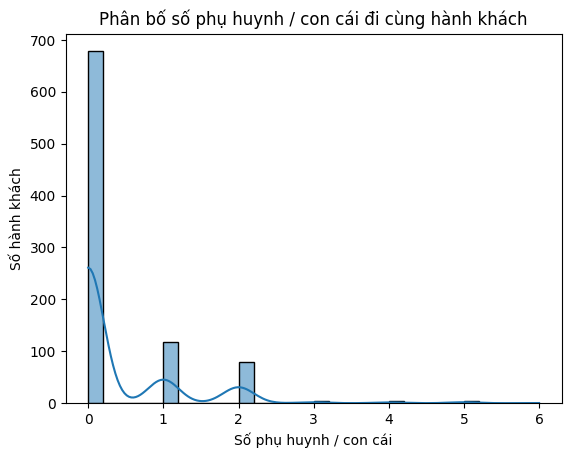

In [82]:
sns.histplot(data=df_train, x='Parch', bins=30, kde=True)
plt.title('Phân bố số phụ huynh / con cái đi cùng hành khách')
plt.xlabel('Số phụ huynh / con cái')
plt.ylabel('Số hành khách')
plt.show()

Nhận xét:

- Số người không đi cùng ba mẹ / con cái là cao nhất -> Khả năng đi một mình cao


# Fare


In [83]:
df_train['Fare'].value_counts().reset_index().iloc[:10]

,Fare,count
0,8.0500,43
1,13.0000,42
2,7.8958,38
3,7.7500,34
4,26.0000,31
5,10.5000,24
6,7.9250,18
7,7.7750,16
8,7.2292,15
9,26.5500,15


In [84]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

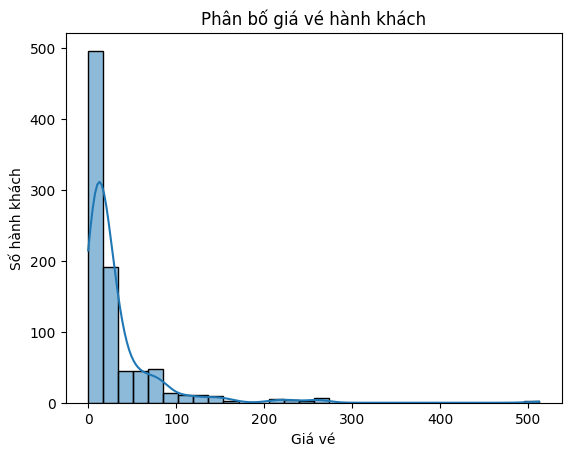

In [85]:
sns.histplot(data=df_train, x='Fare', bins=30, kde=True)
plt.title('Phân bố giá vé hành khách')
plt.xlabel('Giá vé')
plt.ylabel('Số hành khách')
plt.show()

Nhận xét:

- Giá vé tỷ lệ nghịch vối số lượng hành khách


## Embarked


In [86]:
df_train['Embarked'].value_counts().reset_index()

,Embarked,count
0,S,644
1,C,168
2,Q,77


In [87]:
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

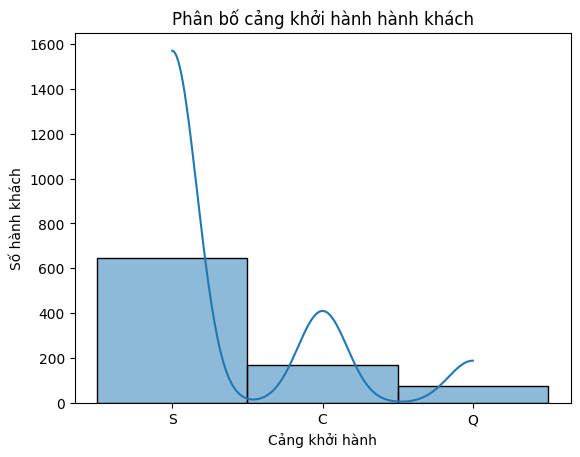

In [88]:
sns.histplot(data=df_train, x='Embarked', bins=30, kde=True)
plt.title('Phân bố cảng khởi hành hành khách')
plt.xlabel('Cảng khởi hành')
plt.ylabel('Số hành khách')
plt.show()

Nhận xét:

- Hàng khách đa phần xuất phát ở cảng S (Southampton)


## Survived


In [89]:
df_train['Survived'].value_counts().reset_index()

,Survived,count
0,0,549
1,1,342


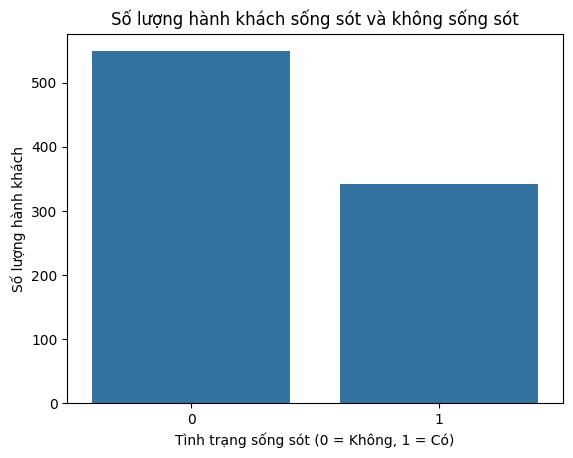

In [90]:
ax = sns.countplot(data=df_train, x='Survived')
ax.set_title('Số lượng hành khách sống sót và không sống sót')
plt.xlabel('Tình trạng sống sót (0 = Không, 1 = Có)')
plt.ylabel('Số lượng hành khách')
plt.show()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


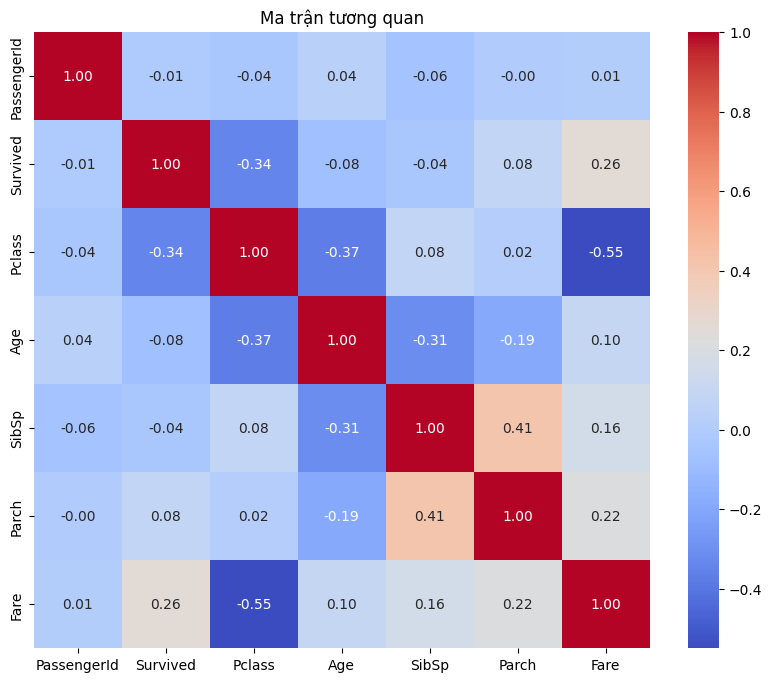

In [91]:
corr = df_train.select_dtypes(include=['number']).corr()
display.display(corr)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Ma trận tương quan')
plt.show()

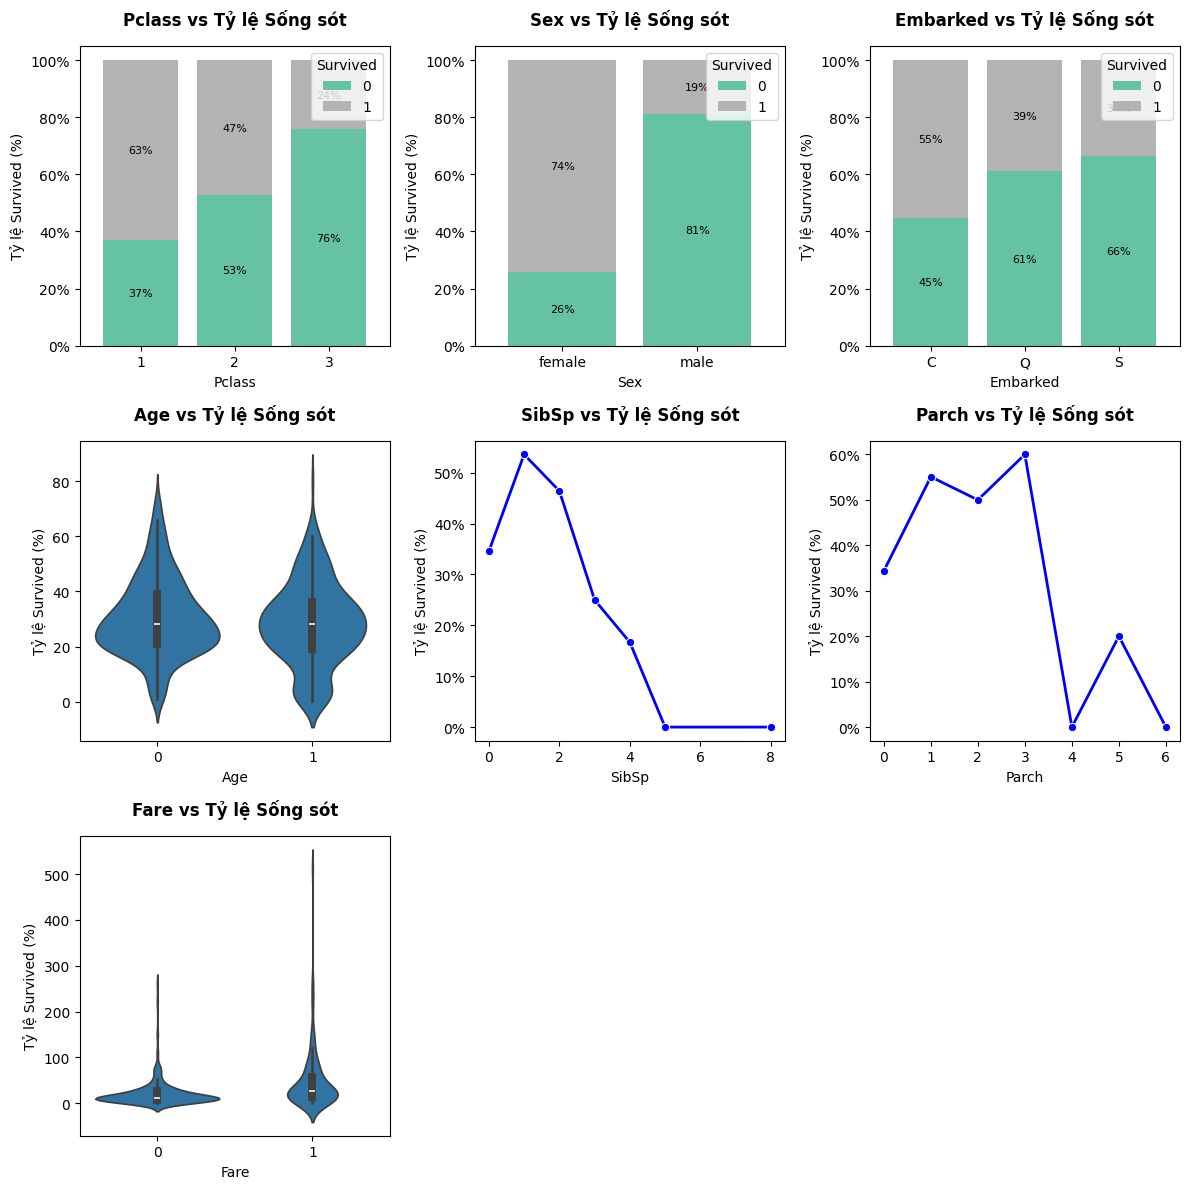

In [105]:
from matplotlib.ticker import PercentFormatter

features = ['Pclass', 'Sex', 'Embarked', 'Age', 'SibSp', 'Parch', 'Fare']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

for i, feat in enumerate(features):
    ax_i = axes[i]
    if df_train[feat].nunique() <= 6:  # rời rạc -> stacked % bar (theo mỗi category)
        # tỉ lệ từng lớp Survived trong mỗi category (hàng dọc cộng = 100%)
        ct = pd.crosstab(df_train[feat], df_train['Survived'], normalize='index') * 100
        ct.plot(kind='bar', stacked=True, ax=ax_i, colormap='Set2', width=0.8, legend=False)
        ax_i.set_ylabel('Percent (%)')
        ax_i.set_xticklabels(ax_i.get_xticklabels(), rotation=0)
        ax_i.yaxis.set_major_formatter(PercentFormatter(xmax=100))
        ax_i.legend(title='Survived', loc='upper right')
        # optional: show % label trên mỗi phân đoạn
        for p in ax_i.patches:
            height = p.get_height()
            if height > 0:
                ax_i.text(p.get_x() + p.get_width()/2, p.get_y() + height/2,
                          f'{height:.0f}%', ha='center', va='center', fontsize=8, color='black')
    elif df_train[feat].nunique() <= 15:  # liên tục -> histplot với % (probability per bin) và format trục y thành % 
        sns.lineplot(data=df_train, x=feat, y='Survived', ax=ax_i, err_style=None, marker='o', linewidth=2, markersize=6, color='blue')
        ax_i.set_ylabel('Percent (%)')
        ax_i.yaxis.set_major_formatter(PercentFormatter(xmax=1))  # stat='probability' -> values in [0,1]
        ax_i.grid(True, alpha=0.2, linestyle=':', linewidth=0.5, which='minor')
    else:  # nhiều giá trị -> dùng histplot với % (probability per bin)
        sns.violinplot(data=df_train, x='Survived', y=feat, ax=ax_i)
        ax_i.set_ylabel('Tuổi')  # Đổi thành tên biến thực tế
        ax_i.set_xlabel('Tình trạng sống sót')
        
    ax_i.grid(True, alpha=0.2, linestyle=':', linewidth=0.5, which='minor')
    # Thêm lưới phụ
    ax_i.grid(True, alpha=0.2, linestyle=':', linewidth=0.5, which='minor')
    ax_i.set_ylabel('Tỷ lệ Survived (%)')
    ax_i.set_xlabel(feat)
    ax_i.set_title(f'{feat} vs Tỷ lệ Sống sót', fontsize=12, fontweight='bold', pad=15)

# xoá ô thừa
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Nhận xét:

- Pclass: mối liên hệ rõ rệt nhất — hành khách hạng cao (Pclass=1) có tỷ lệ sống cao hơn, Pclass=3 đông nhưng tỷ lệ sống thấp (tương quan âm ~ -0.34).
- Fare: vé đắt liên quan với khả năng sống cao hơn (tương quan dương ~ +0.26); phân bố Fare lệch phải — cần cân nhắc log-transform khi dùng làm đặc trưng.
- Age: ảnh hưởng yếu, xu hướng trẻ hơn có khả năng sống hơi cao hơn nhưng tương quan rất nhỏ (~ -0.08); cần xử lý giá trị thiếu và có thể chia nhóm tuổi (bins).
- SibSp & Parch: đa số giá trị bằng 0 (nhiều hành khách đi một mình); cả hai có tác động rất yếu lên Survived (SibSp ~ -0.03, Parch ~ +0.08). Có thể tạo biến “family_size” hoặc kết hợp để tăng thông tin.
- Kết luận nhanh cho mô hình: ưu tiên Pclass và Fare (và biến thể của Fare), xử lý Age (impute + binning) và thử kết hợp SibSp/Parch, bỏ hoặc cẩn trọng với Cabin do nhiều thiếu hụt.


## Kết thúc
